In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2 as cv

In [2]:
filename = 'Yi_No_Data_April4_UnicodeProblem.csv'
df = pd.read_csv (filename)
df.shape, df.head()

((33432, 11),
   author  class_gram class_type  class code  pos_x  pos_y  size  confidence  \
 0     yi           0        num      1    0    148   1886    15       77.12   
 1     yi           0        num      1    0   1194   1890    15        0.71   
 2     yi           0        num      1    0   1176   1889    15        0.83   
 3     yi           0        num      1    0   1180   1885    14       78.98   
 4     yi           0        num      1    0    104   1882    23        1.00   
 
    difference                                             base64  
 0        0.19  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 1        0.21  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 2        0.22  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 3        0.23  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 4        0.24  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  )

In [3]:
import base64
def cv_from_b64 (s):
    str = base64.b64decode (s)
    nparr = np.frombuffer (str, np.uint8)
    img = cv.imdecode (nparr, cv.IMREAD_ANYCOLOR)
    return img
#

def imdsp (cvimg):
    img2 = cvimg[:,:,::-1]
    plt.imshow(img2)
    plt.show()
#

s = df['base64'][0]
print ('b64string = ', s[:20])
str = base64.b64decode(s)
print ('decoded = ', str[:20])
nparr = np.frombuffer (str, np.uint8)
print ('nparr = ', nparr.shape, nparr[:50])
img = cv.imdecode(nparr, cv.IMREAD_ANYCOLOR)


b64string =  Qk02CAAAAAAAADYEAAAo
decoded =  b'BM6\x08\x00\x00\x00\x00\x00\x006\x04\x00\x00(\x00\x00\x00 \x00'
nparr =  (2102,) [66 77 54  8  0  0  0  0  0  0 54  4  0  0 40  0  0  0 32  0  0  0 32  0  0
  0  1  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [4]:
print (df.iloc[3000])
img = cv_from_b64 (df['base64'][3000])
img.shape, img, img[0,0]

author                                                       yi
class_gram                                                    0
class_type                                                  kor
class                                                       205
code                                                          게
pos_x                                                       356
pos_y                                                       825
size                                                         28
confidence                                                  0.9
difference                                                  0.2
base64        Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
Name: 3000, dtype: object


((32, 32), array([[255, 255, 255, ...,  78, 252, 255],
        [255, 255, 255, ...,   0,  48, 255],
        [255, 255, 255, ...,   0,  44, 235],
        ..., 
        [255, 255, 255, ...,   0,  48, 255],
        [255, 255, 255, ...,   0,  48, 255],
        [255, 255, 255, ..., 251, 252, 255]], dtype=uint8), 255)

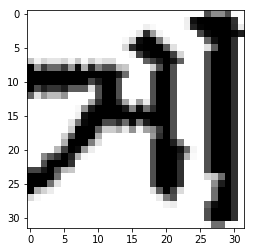

In [5]:
plt.imshow (img, cmap='gray')
plt.show ()

author                                                       no
class_gram                                                    0
class_type                                                  chi
class                                                      1848
code                                                          說
pos_x                                                       698
pos_y                                                       933
size                                                         47
confidence                                                 81.9
difference                                                 0.27
base64        Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
Name: 33000, dtype: object
(32, 32)


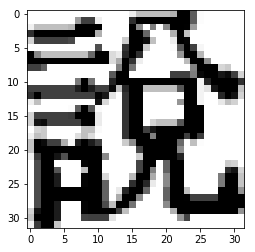

In [6]:
indx = 33000
print (df.iloc[indx])
img = cv_from_b64 (df['base64'][indx])
print (img.shape)
plt.imshow (img, cmap='gray')
plt.show()

In [7]:
img.shape, len(img.shape) == 2

((32, 32), True)

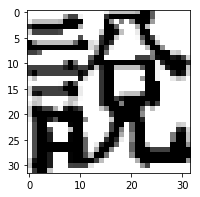

In [8]:
plt.figure(figsize=(3,3))
plt.imshow (img, cmap='gray', resample=False, interpolation=None)
plt.show()

In [9]:
from IPython.display import display, HTML

def imshow(name, imageArray):
     _, png = cv.imencode('.png', imageArray)
     encoded = base64.b64encode(png)
     return HTML(data='''<img alt="{0}" src="data:image/png;base64, {1}"/>'''.format(name, encoded.decode('ascii')))
#

In [10]:
imshow('image display', img)

In [11]:
a = df.iloc[3300]
print (a.code, a.code == '고')

고 True


In [12]:
df.head()

,author,class_gram,class_type,class,code,pos_x,pos_y,size,confidence,difference,base64
0,yi,0,num,1,0,148,1886,15,77.12,0.19,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1,yi,0,num,1,0,1194,1890,15,0.71,0.21,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
2,yi,0,num,1,0,1176,1889,15,0.83,0.22,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
3,yi,0,num,1,0,1180,1885,14,78.98,0.23,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
4,yi,0,num,1,0,104,1882,23,1.00,0.24,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...


In [13]:
rkdf = df.loc[df['code'] == '가']

In [14]:
print (rkdf.shape)
rkdf.head()

(617, 11)


,author,class_gram,class_type,class,code,pos_x,pos_y,size,confidence,difference,base64
1704,yi,1,kor,182,가,1049,593,31,86.48,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1705,yi,1,kor,182,가,615,616,30,0.87,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1706,yi,1,kor,182,가,313,721,34,78.80,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1707,yi,1,kor,182,가,823,591,35,75.60,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1708,yi,1,kor,182,가,731,492,34,74.90,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...


In [15]:
#[x for x in rkdf['base64']]
cv_from_b64 (rkdf['base64'].iloc[0])
imgs = []
for x in rkdf['base64']:
#    print (x)
    imgs.append (cv_from_b64(x))
#

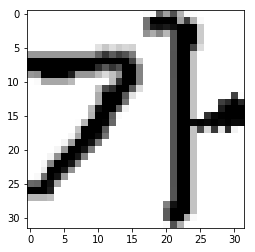

In [16]:
#rkdf['base64'].iloc[0]
plt.imshow (imgs[20], cmap='gray')

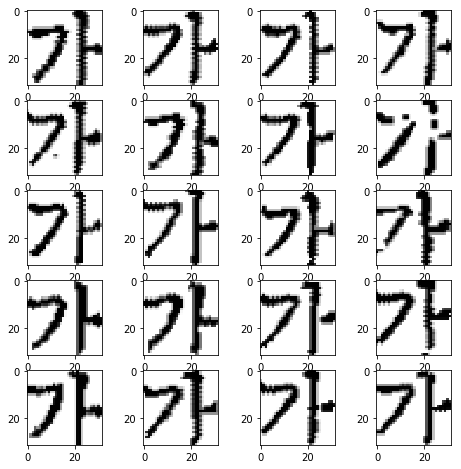

In [17]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = imgs[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [18]:
# create a new column named 'images'
rkdf = rkdf.assign (images = imgs) 

In [19]:
rkdf.columns

Index(['author', 'class_gram', 'class_type', 'class', 'code', 'pos_x', 'pos_y',
       'size', 'confidence', 'difference', 'base64', 'images'],
      dtype='object')

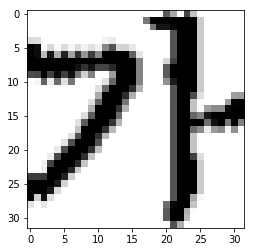

In [20]:
plt.imshow (rkdf['images'].iloc[110], cmap='gray')

In [21]:
rkdf.shape

(617, 12)

In [22]:
dstack = []
for i in range (rkdf['images'].shape[0]):
    dstack.append (rkdf['images'].iloc[i].reshape(-1))
rkdata = np.vstack (dstack)
rkdata.shape

(617, 1024)

In [23]:
a = rkdf['images'].iloc[0].reshape(-1)
a.shape
s = np.vstack ((a,a))
print (s, s.shape)

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]] (2, 1024)


In [24]:
import r_pca
# use R_pca to estimate the degraded data as L + S, where L is low rank, and S is sparse
rpca = r_pca.R_pca(rkdata)
L, S = rpca.fit(max_iter=10000, iter_print=100)

iteration: 1, error: 945719.9190519253
iteration: 100, error: 265.5579626127955
iteration: 200, error: 21.502068280520163
iteration: 300, error: 3.722682451522931
iteration: 395, error: 1.0641938363729537


(617,) [  1.65327348e+05   2.66051957e+04   1.12449832e+04   1.05003031e+04
   7.12892969e+03   6.63724243e+03   6.17780854e+03   4.74305566e+03
   4.51104552e+03   3.96693367e+03   3.75901697e+03   2.95270524e+03
   2.77861948e+03   2.66078527e+03   2.33935615e+03   2.22729226e+03
   1.86970455e+03   1.81609563e+03   1.70563454e+03   1.57071680e+03
   1.39528241e+03   1.35346969e+03   1.18489372e+03   1.14768768e+03
   1.10837470e+03   1.06747294e+03   1.03154464e+03   9.58937612e+02
   8.59385542e+02   8.09540413e+02   7.94493195e+02   7.47599653e+02
   6.84344624e+02   6.70405315e+02   6.33052585e+02   5.83809164e+02
   5.56988249e+02   5.27947764e+02   5.11079306e+02   4.47530532e+02
   4.35771406e+02   4.17448522e+02   4.11742449e+02   3.83532685e+02
   3.63158503e+02   3.32716612e+02   3.21005554e+02   3.11564608e+02
   2.92487698e+02   2.86975172e+02   2.74921694e+02   2.53158595e+02
   2.43176883e+02   2.36979962e+02   2.27736893e+02   2.19575257e+02
   2.00896682e+02   1.92402

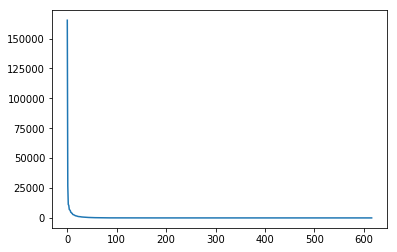

In [25]:
uL,dL,vL = np.linalg.svd (L)
print (dL.shape, dL[:100])
plt.plot (range(dL.shape[0]), dL)

In [26]:
np.max ( np.abs(S) )

261.46889932738719

(617,) [ 163616.19076903   26537.63023523   13106.17803708   12137.83113023
    8736.78200428    8171.15264555    7523.10716663    6558.59823693
    6269.18682507    5902.67088765]


([<matplotlib.lines.Line2D at 0x22a4ef9c9e8>],
 [<matplotlib.lines.Line2D at 0x22a4ef9cba8>])

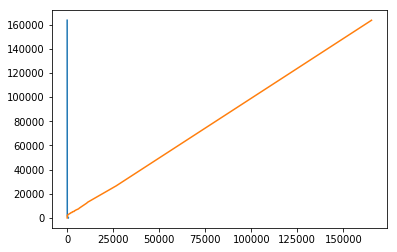

In [27]:
u,d,v = np.linalg.svd (rkdata)
print (d.shape, d[:10])
plt.plot (range(d.shape[0]), d), plt.plot (dL, d)

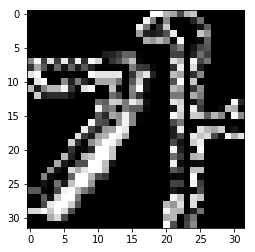

In [28]:
d = np.abs( rkdata[0] - rkdata[1] ).reshape(32,32)
plt.imshow (d, cmap='gray')

In [29]:
m = cv.merge ((255-rkdf['images'].iloc[0], 255-rkdf['images'].iloc[1], 255-rkdf['images'].iloc[2]))

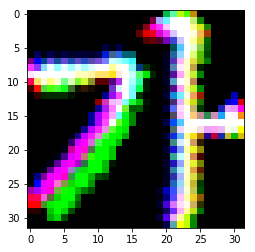

In [30]:
plt.imshow (m)

(1024,) [ 0.          0.          1.61033936 ...,  0.          0.          0.        ]


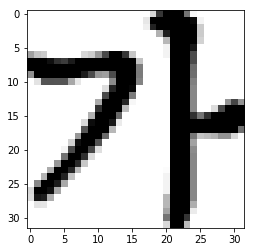

In [31]:
mean_img = np.median (rkdata, axis=0) # np.mean (rkdata, axis=0)
plt.imshow (mean_img.reshape(32,32), cmap='gray')

std_img =  np.sqrt (  np.sum ((rkdata - mean_img) * (rkdata - mean_img), axis=0) / rkdata.shape[0] ) # to be fixed.
print (std_img.shape, std_img)
#std_img =  np.std (rkdata, axis=0)

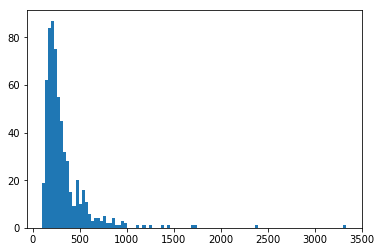

In [32]:
def dist (x, m, s):
    d = 0
    for i in range(s.shape[0]):
        if s[i] != 0.0:
            d += np.abs(x[i] - m[i])/s[i]
    return d

dists = [dist(x, mean_img, std_img) for x in rkdata]

#plt.plot (dists)
h=plt.hist (dists, bins=100)

@ argmax(dists) =  459
@ stats(dists) =  322.118718353 250.46714158 3338.74411256 12.0439965705


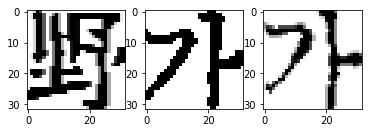

In [33]:
imax = np.argmax (dists)
print ('@ argmax(dists) = ', imax)
print ('@ stats(dists) = ', np.mean(dists), np.std(dists), dists[imax], (dists[imax]-np.mean(dists))/np.std(dists))

plt.subplot (131)
plt.imshow (rkdata[imax].reshape(32,32), cmap='gray')
plt.subplot (132)
plt.imshow (rkdata[imax-1].reshape(32,32), cmap='gray')
plt.subplot (133)
plt.imshow (rkdata[imax+1].reshape(32,32), cmap='gray')

[459  93 614  26  24 540 544 212 465 201]
index = 459  m_dist = 3338.7   dist normalized =  12.0
index =  93  m_dist = 2394.7   dist normalized =   8.3
index = 614  m_dist = 1740.3   dist normalized =   5.7
index =  26  m_dist = 1707.5   dist normalized =   5.5
index =  24  m_dist = 1452.9   dist normalized =   4.5
index = 540  m_dist = 1378.8   dist normalized =   4.2
index = 544  m_dist = 1250.3   dist normalized =   3.7
index = 212  m_dist = 1194.1   dist normalized =   3.5
index = 465  m_dist = 1108.4   dist normalized =   3.1
index = 201  m_dist = 993.1   dist normalized =   2.7


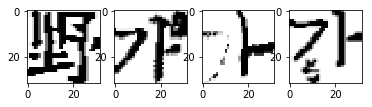

In [34]:
asort = np.argsort (dists)[::-1]
print (asort[:10])
for i in asort[:10]:
    print ('index = %3d  m_dist = %.1f   dist normalized = %5.1f' %
           (i, dist(rkdata[i], mean_img, std_img), (dists[i]-np.mean(dists))/np.std(dists)))

plt.subplot (141)
plt.imshow (rkdata[asort[0]].reshape(32,32), cmap='gray')
plt.subplot (142)
plt.imshow (rkdata[asort[1]].reshape(32,32), cmap='gray')
plt.subplot (143)
plt.imshow (rkdata[asort[2]].reshape(32,32), cmap='gray')
plt.subplot (144)
plt.imshow (rkdata[asort[3]].reshape(32,32), cmap='gray')

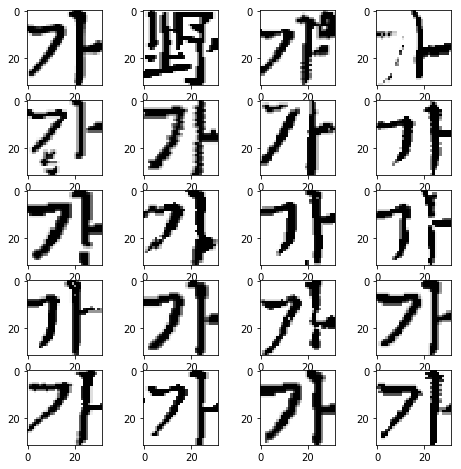

In [35]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
fig.add_subplot(rows,columns,1)
plt.imshow (mean_img.reshape(32,32), cmap='gray')
for i in range(columns*rows-1):
    img = rkdata[asort[i]].reshape(32,32)
    fig.add_subplot(rows, columns, i+2)
    plt.imshow(img, cmap='gray')
plt.show()

In [41]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(rkdata)
X = pca.transform(rkdata)

In [48]:
from scipy.cluster.vq import *

In [66]:
rkd = rkdata.astype (np.float64)
print (rkd.shape, rkd.dtype)

centroids, var = kmeans (rkd, 2)


(617, 1024) float64


(2, 1024) 1625.1189243


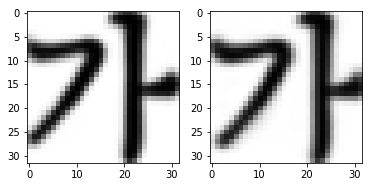

In [65]:
print (centroids.shape, var)

plt.subplot (121)
plt.imshow (centroids[0].reshape(32,32), cmap='gray')
plt.subplot (122)
plt.imshow (centroids[1].reshape(32,32), cmap='gray')

In [86]:
code, distance = vq (rkd, centroids)
print (code.shape, distance.shape)

(617,) (617,)


@ code 0 len = 254
@ code 1 len = 363


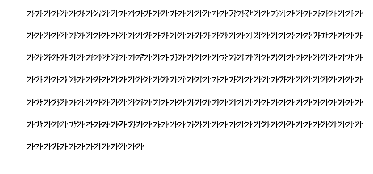

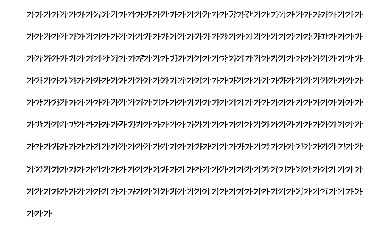

In [89]:
for k in range (2):
    plt.figure()
    indx = np.where (code==k)[0]
    print ('@ code %d len = %d' % (k, len(indx)))
    plt.gray()
    for i in range (min(len(indx), 400)):
        plt.subplot (10, 40, i+1)
        i25x25 = cv.resize (rkdata[i].reshape(32,32), (25,25), cv.INTER_AREA)
        plt.axis('off')
        plt.imshow (i25x25)
    #print (k, ndx[0], ndx)

### Manifold Learning

In [116]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [199]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, data, oindx=None, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        #print (X[i,0], X[i,1])
        plt.plot(X[i, 0], X[i, 1], 'g.')#, #'%d'%(i),
                 #color=plt.cm.Set1(0.2),
#                 fontdict={'weight': 'bold', 'size': 9, 'color': plt.cm.Set1(0.2)})
    #
    if oindx is not None:
        for i in range(10):
            k = oindx[i];
            plt.plot (X[k,0], X[k,1], 'r.')
            plt.text (X[k,0], X[k,1], '%d'%(k),
                     fontdict={'color': 'red'})
        #
        for i in range(10):
            k = oindx[-i-1];
            plt.plot (X[k,0], X[k,1], 'b.')
            plt.text (X[k,0], X[k,1], '%d'%(k),
                     fontdict={'color': 'blue'})
        #
        k = oindx[0]
        plt.plot (X[k,0], X[k,1], 'k*')
        plt.text (X[k,0], X[k,1], '%d'%(k), fontdict={'color': 'black'})
    #
    
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#

Computing t-SNE embedding
[ 513.71392822 -674.53314209]


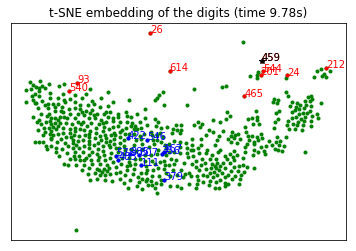

In [209]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(rkdata)

plot_embedding(X_tsne, rkdata, oindx=asort,
               title="t-SNE embedding of the digits (time %.2fs)" % (time() - t0))
print (X_tsne[0])
plt.show()

408 [-283.29541016  -67.72686005] uint8


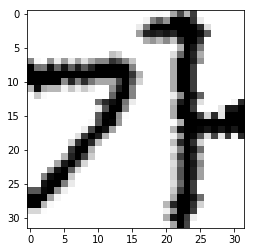

In [210]:
i = np.argmin (X_tsne, )
print (i, X_tsne[i], rkdata.dtype)
plt.imshow (rkdata[0].reshape(32,32))

Computing Spectral embedding


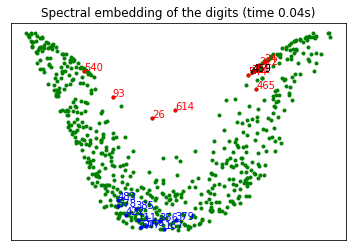

In [190]:
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se, rkdata, oindx=asort, title=
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))


Computing Totally Random Trees embedding


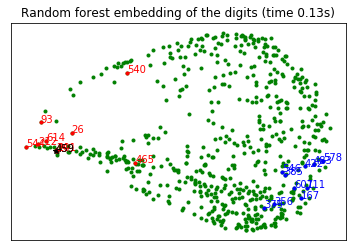

In [191]:
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced, rkdata, oindx=asort, title=
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing MDS embedding
Done. Stress: 8499002294.089253


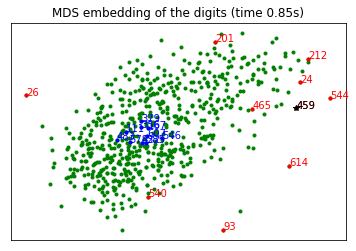

In [192]:
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds, rkdata, oindx=asort, title=
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing LTSA embedding
Done. Reconstruction error: 0.0697307


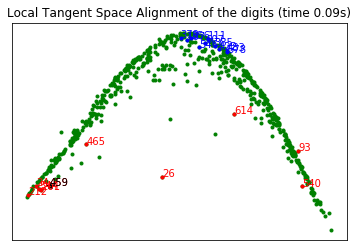

In [193]:
n_neighbors = 20
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa, rkdata, oindx=asort, title=
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))

Computing Hessian LLE embedding
Done. Reconstruction error: 0.069732


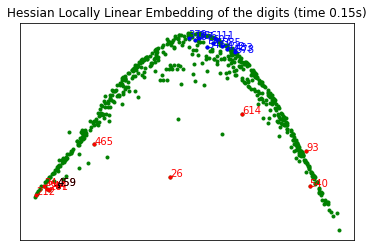

In [194]:
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle, rkdata, oindx=asort, title=
               "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing modified LLE embedding
Done. Reconstruction error: 0.0815466


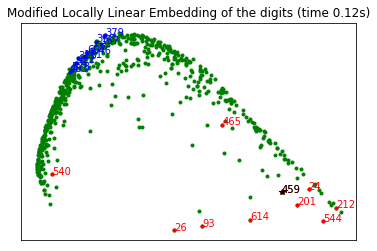

In [195]:
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle, rkdata, oindx=asort, title=
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing LLE embedding
Done. Reconstruction error: 1.92598e-06


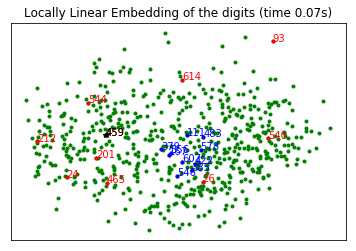

In [196]:
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle, rkdata, oindx=asort, title=
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing Isomap embedding
Done.


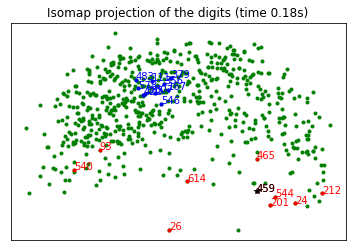

In [197]:
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,rkdata, oindx=asort, title=
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))

Computing PCA projection


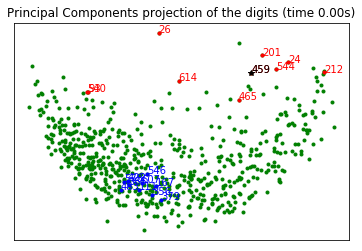

In [198]:
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca, rkdata, oindx=asort, title=
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))